In [172]:
import pandas as pd
import numpy as np

Ideja zadatka je analizirati razlike u školstvu u zemljama svijeta.
Podatke uzimam sa stranice http://data.un.org/

In [173]:
data_popc = pd.read_csv('Population Growth Rates in Urban areas and Capital cities.csv', encoding='utf-8')
data_pop = pd.read_csv('Population Growth, Fertility and Mortality.csv', encoding='utf-8')
#data_gen = pd.read_csv('Population, Surface Area and Density.csv', encoding='utf-8')
data_edu = pd.read_csv('Public Expenditure on Education.csv', encoding='utf-8')
data_gdp = pd.read_csv('GDP and GDP Per Capita.csv', encoding='utf-8')

Provjeravam za koje godine imam sve podatke. Ovdje gledam kriterij postotak BDP-a koji se troši na školstvo jer je to jedan od najvažnijih pokazatelja.

In [174]:
data_edu[data_edu['Series'] == 'Public expenditure on education (% of GDP)'].groupby(['Year']).size()

Year
2000     17
2001     13
2002     22
2003     16
2004     32
2005    113
2006     12
2007      9
2008     26
2009     27
2010    126
2011     14
2012     13
2013     23
2014     22
2015     60
2016     38
2017     55
2018      1
dtype: int64

Vidim da niti za jednu godinu nemam kompletne podatke. Zato ću raditi na podacima koji su prosjek zadnjih 10 godina, odnosno nakon 2010. godine. Iako će vrijednosti određenih pokazatelja fluktuirati tijekom ovih godina, važniji je odnos između država nego apsoutne vrijednosti.

In [175]:
for podaci in (data_popc, data_pop, data_edu, data_gdp):
    podaci.drop(podaci[podaci.Year < 2010].index, inplace=True)

Ostavljam podatke koji će mi trebati. Ostale brišem. Pogledajmo koje podatke imam.

In [176]:
print(data_popc['Series'].drop_duplicates().to_numpy())
print(data_pop['Series'].drop_duplicates().to_numpy())
print(data_edu['Series'].drop_duplicates().to_numpy())
print(data_gdp['Series'].drop_duplicates().to_numpy())

['Urban population (percent)'
 'Urban population (percent growth rate per annum)'
 'Rural population (percent growth rate per annum)'
 'Capital city population (thousands)'
 'Capital city population (as a percentage of total population)'
 'Capital city population (as a percentage of total urban population)']
['Population annual rate of increase (percent)'
 'Total fertility rate (children per women)'
 'Infant mortality for both sexes (per 1,000 live births)'
 'Maternal mortality ratio (deaths per 100,000 population)'
 'Life expectancy at birth for both sexes (years)'
 'Life expectancy at birth for males (years)'
 'Life expectancy at birth for females (years)']
['Current expenditure other than staff compensation as % of total expenditure in public institutions (%)'
 'All staff compensation as % of total expenditure in public institutions (%)'
 'Capital expenditure as % of total expenditure in public institutions (%)'
 'Expenditure by level of education: primary (as % of government expend

Dodaj koje podatke uzimam.????????

In [177]:
data_popc.drop(data_popc[data_popc.Series != 'Urban population (percent)'].index, inplace=True)
data_pop.drop(data_pop[data_pop.Series != 'Life expectancy at birth for both sexes (years)'].index, inplace = True)

In [178]:
izbaci = data_edu.Series.isin(['Expenditure by level of education: primary (as % of government expenditure)',
                               'Expenditure by level of education: secondary (as % of government expenditure)',
                               'Expenditure by level of education: tertiary (as % of government expenditure)',
                               'Expenditure by level of education: pre-primary (as % of government expenditure)'
                              ])
data_edu.drop(data_edu[izbaci].index, inplace=True)

In [179]:
data_gdp.drop(data_gdp[data_gdp.Series != 'GDP per capita (US dollars)'].index, inplace=True)

Pretvaram stupce s brojevima iz object u type float64.

In [180]:
data_popc['Value'] = data_popc['Value'].astype(str).astype(float)

In [181]:
data_gdp['Value'] = data_gdp['Value'].astype(str).str.replace(',', '').astype(float)

In [182]:
data_gdp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 848 entries, 10 to 5788
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Region/Country/Area  848 non-null    int64  
 1   Unnamed: 1           848 non-null    object 
 2   Year                 848 non-null    int64  
 3   Series               848 non-null    object 
 4   Value                848 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 39.8+ KB


Sada grupiram vrijednosti po državama (to je stupac 'Unnamed: 1') i računam prosjek

In [183]:
a = data_popc.groupby('Unnamed: 1')['Value'].mean()

In [184]:
b = data_pop.groupby('Unnamed: 1')['Value'].mean()

In [185]:
c = data_edu.groupby(['Unnamed: 1', 'Series']).mean()

In [186]:
d = data_gdp.groupby('Unnamed: 1')['Value'].mean()

In [187]:
a.head(20)

Unnamed: 1
Afghanistan             24.666667
Albania                 56.633333
Algeria                 70.300000
American Samoa          87.333333
Andorra                 88.400000
Angola                  62.900000
Anguilla               100.000000
Antigua and Barbuda     25.266667
Argentina               91.400000
Armenia                 63.200000
Aruba                   43.200000
Australia               85.633333
Austria                 57.800000
Azerbaijan              54.600000
Bahamas                 82.700000
Bahrain                 88.966667
Bangladesh              33.800000
Barbados                31.400000
Belarus                 76.833333
Belgium                 97.866667
Name: Value, dtype: float64

In [188]:
b.head(20)

Unnamed: 1
Afghanistan            60.9765
Albania                76.5630
Algeria                74.8410
Angola                 55.2130
Antigua and Barbuda    75.8005
Argentina              75.2715
Armenia                73.3635
Aruba                  75.0190
Australia              81.9195
Austria                80.5580
Azerbaijan             70.8315
Bahamas                72.2370
Bahrain                76.0495
Bangladesh             69.8130
Barbados               78.3575
Belarus                70.8525
Belgium                80.0470
Belize                 72.0460
Benin                  59.2455
Bermuda                79.2900
Name: Value, dtype: float64

In [189]:
c.reset_index(inplace=True)

In [190]:
c.Series.drop_duplicates().to_numpy()

array(['All staff compensation as % of total expenditure in public institutions (%)',
       'Capital expenditure as % of total expenditure in public institutions (%)',
       'Current expenditure other than staff compensation as % of total expenditure in public institutions (%)',
       'Public expenditure on education (% of GDP)',
       'Public expenditure on education (% of government expenditure)'],
      dtype=object)

In [191]:
c.set_index('Unnamed: 1', inplace=True)

In [192]:
c

,Series,Region/Country/Area,Year,Value
Unnamed: 1,,,,
Afghanistan,All staff compensation as % of total expenditu...,4.0,2012.5,71.912700
Afghanistan,Capital expenditure as % of total expenditure ...,4.0,2012.5,18.955650
Afghanistan,Current expenditure other than staff compensat...,4.0,2012.5,9.131700
Afghanistan,Public expenditure on education (% of GDP),4.0,2014.0,3.543600
Afghanistan,Public expenditure on education (% of governme...,4.0,2014.0,15.079333
...,...,...,...,...
Viet Nam,Current expenditure other than staff compensat...,704.0,2011.5,31.791250
Viet Nam,Public expenditure on education (% of GDP),704.0,2011.5,5.394600
Viet Nam,Public expenditure on education (% of governme...,704.0,2011.5,17.815000


In [193]:
c[c.Series=='All staff compensation as % of total expenditure in public institutions (%)']['Value']

Unnamed: 1
Afghanistan                 71.91270
Albania                     76.09600
Andorra                     36.09150
Argentina                   84.14395
Armenia                     82.46800
                              ...   
United Kingdom              66.45955
United States of America    69.54495
Uruguay                     76.87285
Vanuatu                     77.99230
Viet Nam                    44.61140
Name: Value, Length: 135, dtype: float64

In [343]:
stupci = {'Urban (%)' : 'Urban population (percent)',
          'Life expectancy' :'Life expectancy at birth for both sexes (years)',
          'GDP per capita' : 'GDP per capita (US dollars)',
          'Exp on edu (% of GDP)' : 'Public expenditure on education (% of GDP)',
          'Exp on edu (% of gov exp)' : 'Public expenditure on education (% of government expenditure)',
          'Staff (% of total exp)' : 'All staff compensation as % of total expenditure in public institutions (%)',
          'Current exp (% of total exp)' : 'Current expenditure other than staff compensation\n as % of total expenditure in public institutions (%)',
          'Capital exp (% of total exp)' : 'Capital expenditure as % of total expenditure\n in public institutions (%)'
         }

In [218]:
data = pd.DataFrame({'Urban (%)' : a,
              'Life expectancy': b,
              'GDP per capita' : d,
              'Exp on edu (% of GDP)' : c[c.Series=='Public expenditure on education (% of GDP)']['Value'],
              'Exp on edu (% of gov exp)' : c[c.Series=='Public expenditure on education (% of government expenditure)']['Value'],
              'Staff (% of total exp)' : c[c.Series=='All staff compensation as % of total expenditure in public institutions (%)']['Value'],
              'Current exp (% of total exp)' : c[c.Series=='Current expenditure other than staff compensation as % of total expenditure in public institutions (%)']['Value'],
              'Capital exp (% of total exp)' : c[c.Series=='Capital expenditure as % of total expenditure in public institutions (%)']['Value']            
             })

In [219]:
data

,Urban (%),Life expectancy,GDP per capita,Exp on edu (% of GDP),Exp on edu (% of gov exp),Staff (% of total exp),Current exp (% of total exp),Capital exp (% of total exp)
Afghanistan,24.666667,60.9765,593.00,3.5436,15.079333,71.9127,9.1317,18.95565
Albania,56.633333,76.5630,4115.50,3.6963,12.457350,76.0960,15.6955,8.20850
Algeria,70.300000,74.8410,4156.00,NaN,NaN,NaN,NaN,NaN
American Samoa,87.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,88.400000,NaN,38039.25,3.1265,NaN,36.0915,47.3752,1.20650
...,...,...,...,...,...,...,...,...
Western Sahara,86.500000,67.3060,NaN,NaN,NaN,NaN,NaN,NaN
Yemen,34.400000,65.3505,1047.50,NaN,NaN,NaN,NaN,NaN
Zambia,41.600000,55.5205,1389.50,NaN,NaN,NaN,NaN,NaN
Zanzibar,NaN,NaN,781.25,NaN,NaN,NaN,NaN,NaN


In [220]:
data.dropna(inplace=True)

In [221]:
data

,Urban (%),Life expectancy,GDP per capita,Exp on edu (% of GDP),Exp on edu (% of gov exp),Staff (% of total exp),Current exp (% of total exp),Capital exp (% of total exp)
Afghanistan,24.666667,60.9765,593.00,3.54360,15.079333,71.91270,9.13170,18.95565
Albania,56.633333,76.5630,4115.50,3.69630,12.457350,76.09600,15.69550,8.20850
Argentina,91.400000,75.2715,13063.25,5.29595,14.212250,84.14395,8.34300,7.51305
Armenia,63.200000,73.3635,3648.25,3.00355,11.298850,82.46800,8.23520,9.29680
Australia,85.633333,81.9195,55678.50,5.44050,14.201700,65.22720,27.11110,7.66170
...,...,...,...,...,...,...,...,...
United Kingdom,82.433333,80.2765,40803.75,5.65615,13.471500,66.45955,26.59660,6.94390
United States of America,81.600000,78.5665,55910.25,5.20475,13.372750,69.54495,21.05525,9.39980
Uruguay,94.900000,76.7125,14970.25,4.35530,14.926100,76.87285,18.97415,4.15300
Vanuatu,24.933333,69.1155,2985.00,4.69540,11.782700,77.99230,20.81410,1.19360


In [222]:
data2 = pd.DataFrame({'Urban (%)' : a,
              'Life expectancy': b,
              'GDP per capita' : d,
              'Exp on edu (% of GDP)' : c[c.Series=='Public expenditure on education (% of GDP)']['Value']
                    })

In [223]:
data2.dropna(inplace=True)

In [224]:
data2

,Urban (%),Life expectancy,GDP per capita,Exp on edu (% of GDP)
Afghanistan,24.666667,60.9765,593.00,3.54360
Albania,56.633333,76.5630,4115.50,3.69630
Angola,62.900000,55.2130,3878.50,3.47410
Argentina,91.400000,75.2715,13063.25,5.29595
Armenia,63.200000,73.3635,3648.25,3.00355
...,...,...,...,...
Uruguay,94.900000,76.7125,14970.25,4.35530
Uzbekistan,50.766667,69.6655,1811.00,6.41340
Vanuatu,24.933333,69.1155,2985.00,4.69540
Viet Nam,33.366667,74.7775,1972.00,5.39460


In [225]:
data2.index.to_numpy()

array(['Afghanistan', 'Albania', 'Angola', 'Argentina', 'Armenia',
       'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia (Plurin. State of)', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile',
       'China, Hong Kong SAR', 'China, Macao SAR', 'Colombia', 'Comoros',
       'Congo', 'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba',
       'Curaçao', 'Cyprus', 'Czechia', 'Côte d’Ivoire',
       'Dem. Rep. of the Congo', 'Denmark', 'Djibouti', 'Ecuador',
       'El Salvador', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India',
       'Indonesia', 

Sada trebam paket pycountry kako bih dobio listu svih zemalja na svijetu. Paket se instalira naredbom:
conda install -c hargup/label/pypi pycountry ???????????

In [316]:
import pycountry
import matplotlib.pyplot as plt
import scipy.stats as scs
#%matplotlib inline
plt.rcParams['figure.max_open_warning'] = 50
%matplotlib agg
#%matplotlib -l

In [250]:
data.describe()

,Urban (%),Life expectancy,GDP per capita,Exp on edu (% of GDP),Exp on edu (% of gov exp),Staff (% of total exp),Current exp (% of total exp),Capital exp (% of total exp)
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,57.636036,70.366694,15530.063063,4.533950,13.987847,68.524785,22.084718,9.559075
std,23.672273,9.396237,20736.855108,1.482636,4.023870,11.959667,11.231072,7.086279
min,11.900000,45.610500,268.750000,1.332700,2.014433,30.246300,0.876100,0.133300
25%,38.183333,63.852250,1401.750000,3.571600,11.312625,62.934275,15.611900,4.951483
50%,57.133333,73.404500,5694.500000,4.582533,13.471500,70.180650,21.125833,7.909800
75%,77.200000,77.893750,19322.125000,5.459050,16.201900,75.754150,26.826150,11.871000
max,98.833333,82.987000,103730.500000,8.229633,26.701350,98.710700,64.526900,42.460300


In [264]:
data.head(9)

,Urban (%),Life expectancy,GDP per capita,Exp on edu (% of GDP),Exp on edu (% of gov exp),Staff (% of total exp),Current exp (% of total exp),Capital exp (% of total exp)
Afghanistan,24.666667,60.9765,593.00,3.54360,15.079333,71.91270,9.13170,18.95565
Albania,56.633333,76.5630,4115.50,3.69630,12.457350,76.09600,15.69550,8.20850
Argentina,91.400000,75.2715,13063.25,5.29595,14.212250,84.14395,8.34300,7.51305
Armenia,63.200000,73.3635,3648.25,3.00355,11.298850,82.46800,8.23520,9.29680
Australia,85.633333,81.9195,55678.50,5.44050,14.201700,65.22720,27.11110,7.66170
Austria,57.800000,80.5580,45885.25,5.57675,10.741300,69.23695,25.55955,5.20355
Azerbaijan,54.600000,70.8315,4854.00,2.84200,8.451000,60.46815,37.28740,2.24445
Bahrain,88.966667,76.0495,22423.25,2.53145,7.495400,82.32050,13.83050,3.84900
Bangladesh,33.800000,69.8130,1200.75,1.85550,13.506300,84.07130,8.56815,7.36055


In [445]:
def crtaj_histogram(data, stupci={}):
    '''Funkcija prima DataFrame i crta histograme frekvencija svih stupaca zajedno sa funkcijom gustoce normalne razdiobe.
    Dodatni (opcionalni) parametar stupci je dictionary kojim se mogu zadavati imena histograma različita od imena stupaca u tablici.
    Ako je parametar stupci prazan rijecnik, onda su imena histograma imena stupaca u tablici.'''
    
    test = lambda br_stupaca : int(br_stupaca/2)+1 if br_stupaca % 2 else int(br_stupaca/2)
    m = test(len(data.columns)) #Broj redaka u subplots
    
    hist, ax = plt.subplots(m, 2, figsize=(15,15))
    hist.tight_layout(pad=4.0)
    j=0
    for row in ax:
        for axis in row:
            if (j<len(data.columns)):
                axis.hist(data.iloc[:,j], density=True, ec = 'black')
                
                mu, sigma = data.iloc[:,j].mean(), data.iloc[:,j].std()
                x = np.linspace(mu - 3*sigma, mu+3*sigma) #znamo da je u normalnoj distribuciji preko 99% podataka na udaljenosti manjoj od 3*std
                y = scs.norm.pdf(x, mu, sigma)
                axis.plot(x, y, color='red', lw=1.4)
                
                if not bool(stupci): #ako je dict prazan, ispisujem imena stupaca
                    axis.set_title(data.columns[j])
                else: #inace koristi dict   
                    axis.set_title(stupci[data.columns[j]])
                axis.set_ylabel('Frequency')
                axis.set_xlabel('')
            else:
                axis.remove()
            j+=1
    return hist

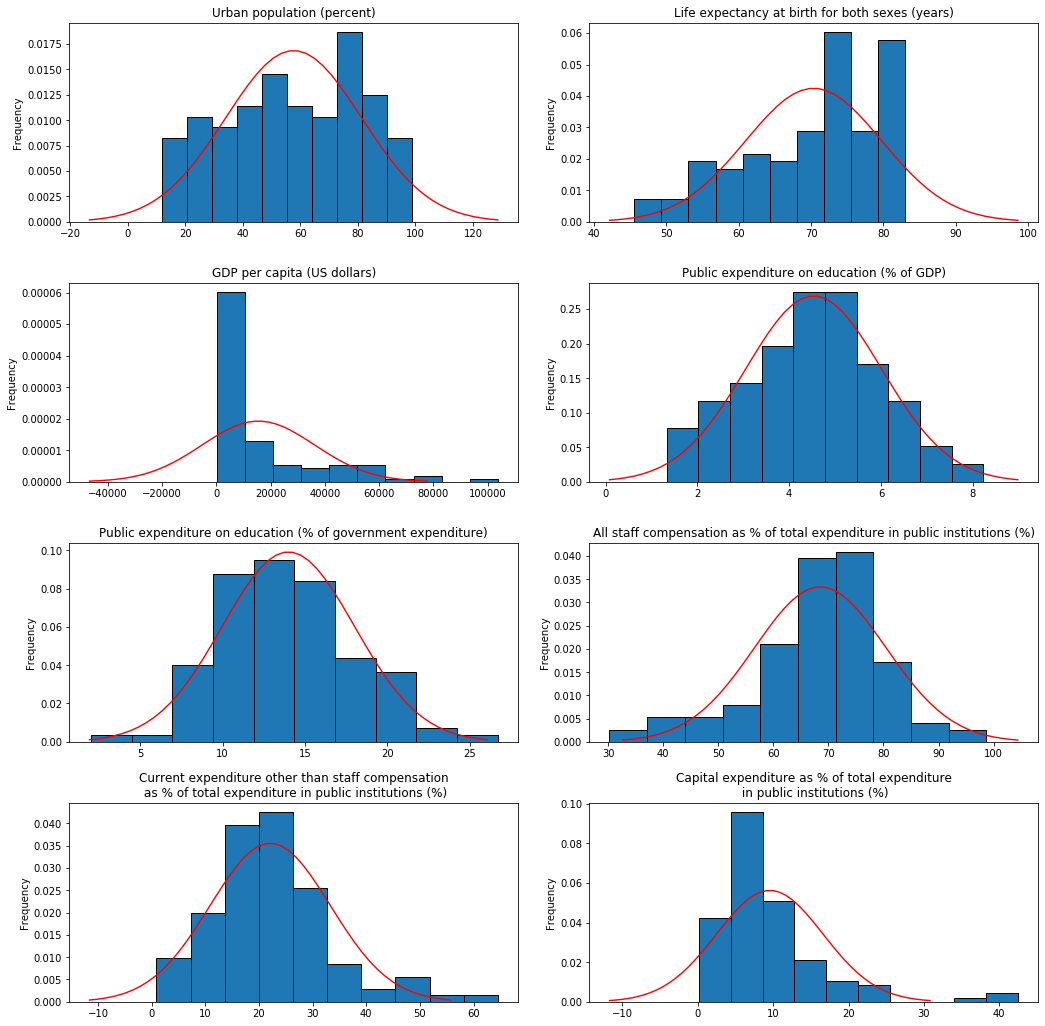

In [446]:
crtaj_histogram(data, stupci)

Trebalo bi x os oznaciti ????

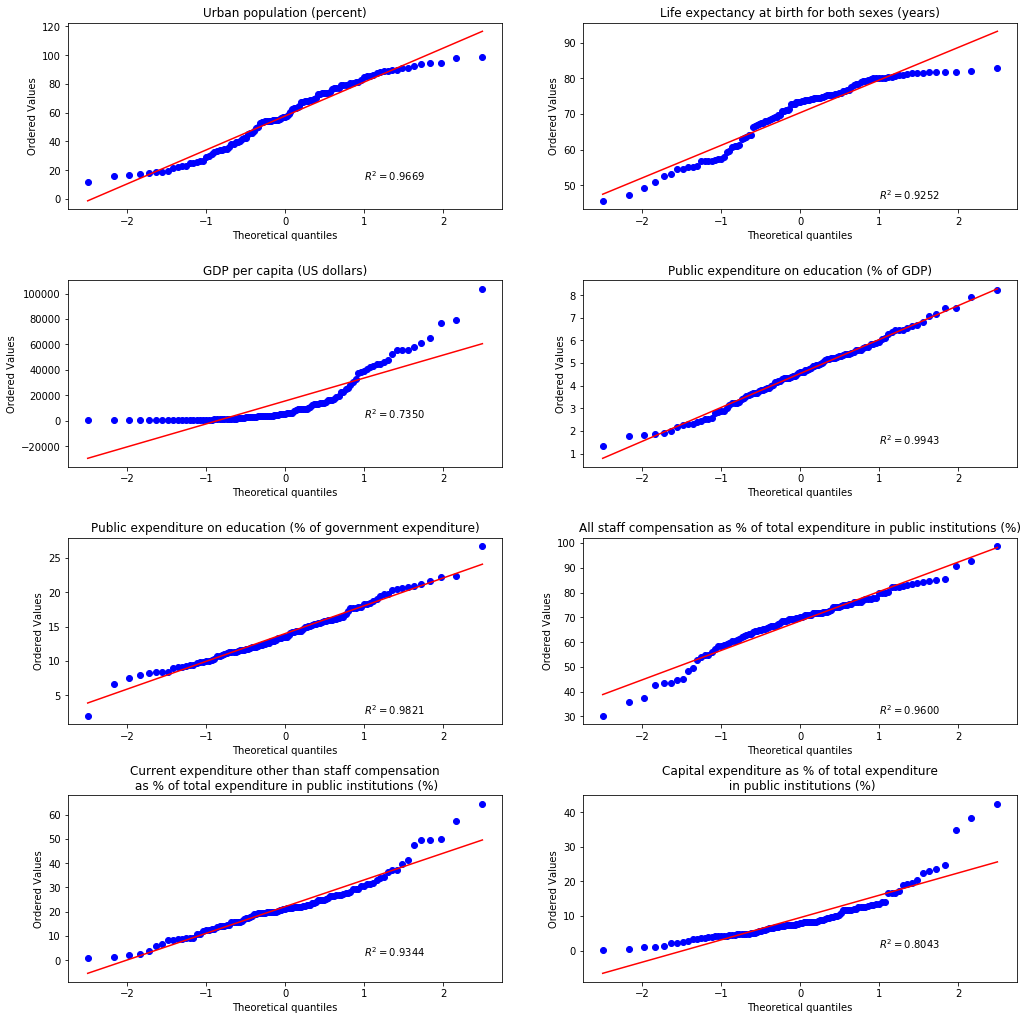

In [460]:
def crtaj_norm_vjer_graf(data, stupci={}):
    
    test = lambda br_stupaca : int(br_stupaca/2)+1 if br_stupaca % 2 else int(br_stupaca/2)
    m = test(len(data.columns)) #Broj redaka u subplots
    
    fig, ax = plt.subplots(m, 2, figsize=(15,15))
    fig.tight_layout(pad=5.0)
    j=0
    for row in ax:
        for axis in row:
            if (j<len(data.columns)):
                stats.probplot(data.iloc[:,j], plot=axis, rvalue=True, dist='norm')
                if not bool(stupci):
                    axis.set_title(data.columns[j])
                else:   
                    axis.set_title(stupci[data.columns[j]])
            else:
                axis.remove()
            j+=1
    return fig
crtaj_norm_vjer_graf(data,stupci)

In [634]:
plt.close('all')

In [374]:
from scipy import stats
from statsmodels.stats.diagnostic import lilliefors

In [418]:
def testovi_normalnosti(data):
    rez = pd.DataFrame(column=data.columns)
    #zavrsi funkciju za ljepsi ispis
    
for stupac in data.columns:
    print(stupac)
    print([round(i, 4) for i in lilliefors(data[stupac], dist='norm', pvalmethod='table')])
    print([round(i,4) for i in stats.normaltest(data[stupac])])
    print([round(i,4) for i in stats.shapiro(data[stupac])])
    print()

Urban (%)
[0.0837, 0.0652]
[25.3696, 0.0]
[0.9593, 0.0019]

Life expectancy
[0.153, 0.001]
[10.3076, 0.0058]
[0.9199, 0.0]

GDP per capita
[0.2309, 0.001]
[48.4706, 0.0]
[0.7368, 0.0]

Exp on edu (% of GDP)
[0.0426, 0.9126]
[0.9639, 0.6176]
[0.9912, 0.6993]

Exp on edu (% of gov exp)
[0.0611, 0.4285]
[2.6187, 0.27]
[0.9858, 0.2909]

Staff (% of total exp)
[0.0951, 0.0202]
[11.8073, 0.0027]
[0.9629, 0.0035]

Current exp (% of total exp)
[0.1069, 0.0045]
[24.2954, 0.0]
[0.9376, 0.0001]

Capital exp (% of total exp)
[0.1584, 0.001]
[66.7446, 0.0]
[0.8104, 0.0]



Iz testova normalnosti ne odbacujem pretpostavku da podaci dolaze iz normalno distribuiranih populacija za Exp on edu (% of GDP) i Exp on edu (% of gov exp). Urban (%), Current exp (% of total exp) i Capital exp (% of total exp) prema testovima nisu normalno distribuirani ali njihovi histogrami pokazuju da nisu daleko od normalnih distribucija. Za ostale podatke niti ne očekujemo da će biti normalno distribuirani.

Izvor: https://enterprise-docs.anaconda.com/en/latest/data-science-workflows/data/stats.html

Korelacija ne implicira kauzalnost (uzročnost).
http://www.tylervigen.com/spurious-correlations
https://www.mathtutordvd.com/public/Why-Correlation-does-not-Imply-Causation-in-Statistics.cfm


### Koeficijenti korelacije

Sada računam koeficijente korelacije između parova podataka danih u tablici.
Prvo računam Pearsonov koeficijent korelacije i testiram hipotezu $H_0: \rho = 0$ nasuprot hipotezi $H_1: \rho \neq 0$.
Za testiranje Pearsonovog koeficijenta nužna je pretpostavka o normalnosti polaznih uzoraka. Zato za provjeru računam i Spearsonov koeficijent jer analogan test [ne zahtjeva](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.spearmanr.html) pretpostavku o normalnosti. Pearsonov koeficijent korelacije pokazuje stupanj linearnog odnosa između podataka, a Spearmanov koeficijent stupanje monotone povezanosti podataka ([izvor](https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/a-comparison-of-the-pearson-and-spearman-correlation-methods/)).


In [608]:
def korelacija(data, metoda):
    '''Funkcija računa matricu koeficijenata korelacija nad svim kombinacijama stupaca matrica.
    Koeficijenti koji su značajni označeni su s ***. Argumenti funkcije su DataFrame podataka i string koju metodu koristim'''
    if metoda not in {'pearson','spearman'}:
        raise ValueError("argument mora biti 'pearson' ili 'spearman'")
    cor = data.corr(method=metoda)
    for i in data.columns:
        for j in data.columns:
            if metoda == 'pearson':
                ro, pvalue = stats.pearsonr(data[i], data[j])
            else:
                ro, pvalue = stats.spearmanr(data[i], data[j])
            if i == j:
                cor.loc[i,j] = ''
            elif pvalue < 0.05:
                cor.loc[i,j] = '***%.4f' % (cor.loc[i,j])
            else:
                cor.loc[i,j] = '%.4f' % (cor.loc[i,j])
    return cor

In [612]:
korelacija(data, 'pearson')

,Urban (%),Life expectancy,GDP per capita,Exp on edu (% of GDP),Exp on edu (% of gov exp),Staff (% of total exp),Current exp (% of total exp),Capital exp (% of total exp)
Urban (%),,***0.7165,***0.6275,***0.3198,-0.1739,***0.2517,-0.1748,-0.1391
Life expectancy,***0.7165,,***0.6548,***0.2799,***-0.2898,0.0633,0.0563,***-0.1967
GDP per capita,***0.6275,***0.6548,,***0.3502,***-0.2463,0.0622,-0.0153,-0.0930
Exp on edu (% of GDP),***0.3198,***0.2799,***0.3502,,***0.4563,0.0594,0.0286,-0.1844
Exp on edu (% of gov exp),-0.1739,***-0.2898,***-0.2463,***0.4563,,-0.0182,-0.0430,0.0513
Staff (% of total exp),***0.2517,0.0633,0.0622,0.0594,-0.0182,,***-0.8119,***-0.3772
Current exp (% of total exp),-0.1748,0.0563,-0.0153,0.0286,-0.0430,***-0.8119,,***-0.2173
Capital exp (% of total exp),-0.1391,***-0.1967,-0.0930,-0.1844,0.0513,***-0.3772,***-0.2173,


In [613]:
korelacija(data, 'spearman')

,Urban (%),Life expectancy,GDP per capita,Exp on edu (% of GDP),Exp on edu (% of gov exp),Staff (% of total exp),Current exp (% of total exp),Capital exp (% of total exp)
Urban (%),,***0.7382,***0.8013,***0.3028,-0.1806,***0.2159,-0.1497,-0.0594
Life expectancy,***0.7382,,***0.8987,***0.3176,***-0.3203,0.0772,0.0260,-0.0574
GDP per capita,***0.8013,***0.8987,,***0.3694,***-0.3484,0.0431,0.0823,-0.1203
Exp on edu (% of GDP),***0.3028,***0.3176,***0.3694,,***0.4500,0.0333,0.0647,-0.1141
Exp on edu (% of gov exp),-0.1806,***-0.3203,***-0.3484,***0.4500,,0.0419,-0.0406,-0.0296
Staff (% of total exp),***0.2159,0.0772,0.0431,0.0333,0.0419,,***-0.7731,***-0.3555
Current exp (% of total exp),-0.1497,0.0260,0.0823,0.0647,-0.0406,***-0.7731,,-0.1500
Capital exp (% of total exp),-0.0594,-0.0574,-0.1203,-0.1141,-0.0296,***-0.3555,-0.1500,


Vidim da se zaključci o koreliranosti podataka razlikuju z dva slučaja: Capital exp (% of total exp) - Life expectancy i Capital exp (% of total exp) - Current exp (% of total exp). To su upravo slučajevi kada podaci odstupaju od normalnosti.

In [645]:
s = list(stupci.keys())

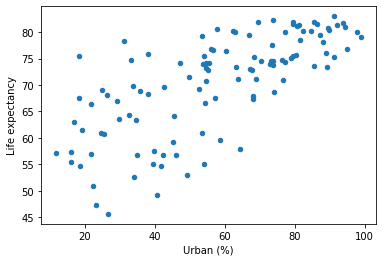

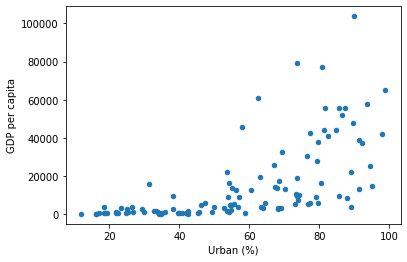

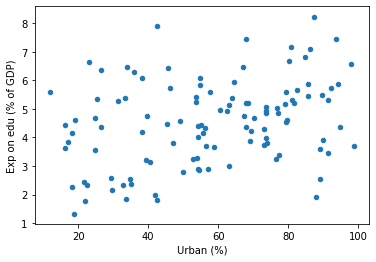

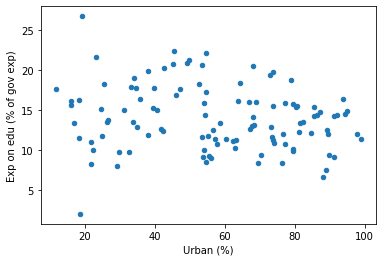

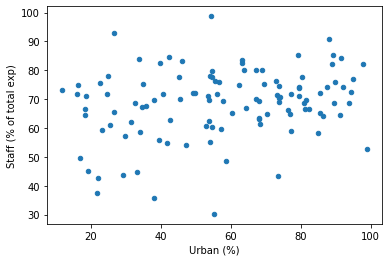

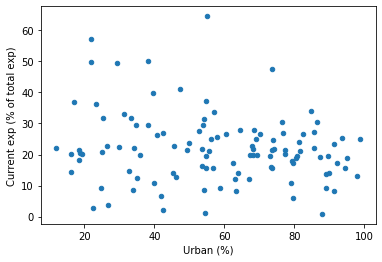

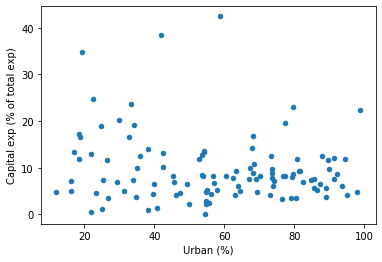

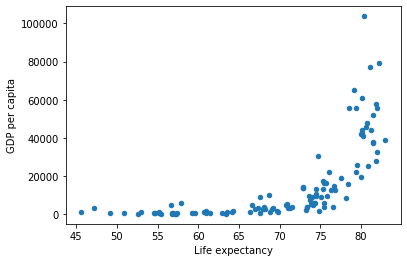

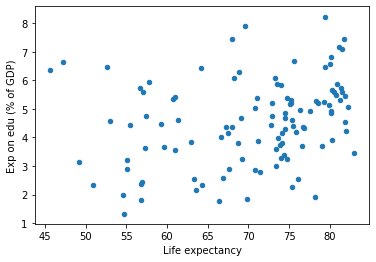

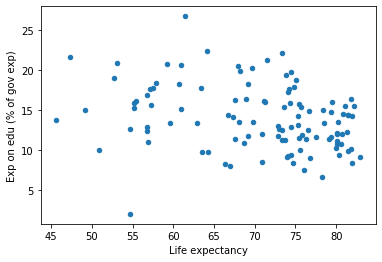

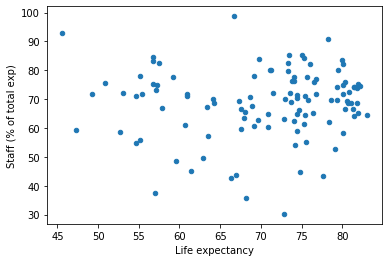

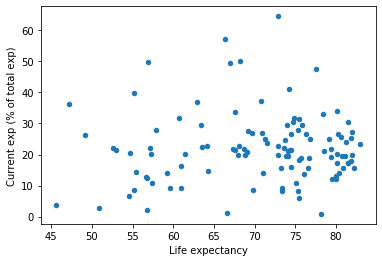

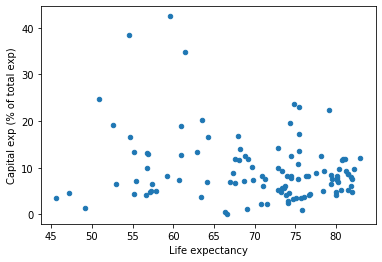

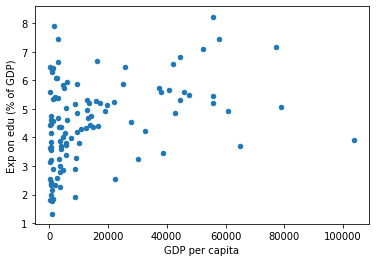

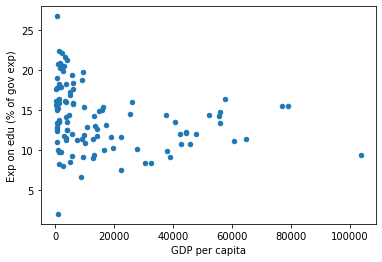

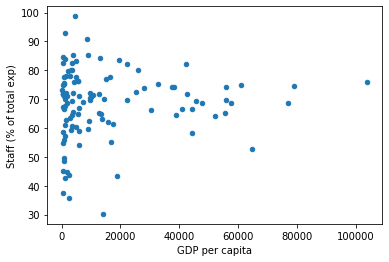

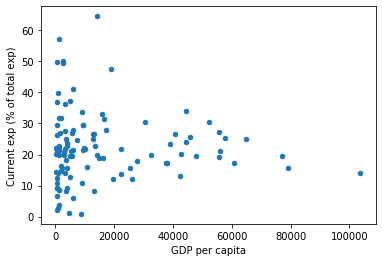

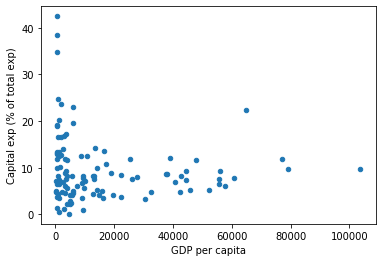

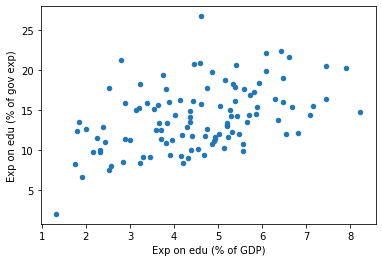

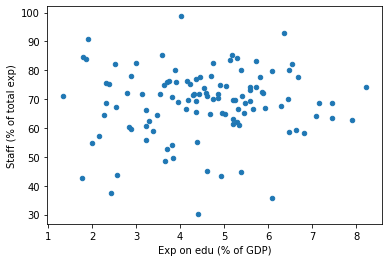

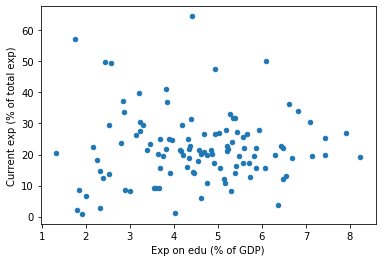

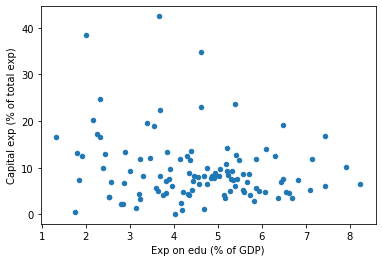

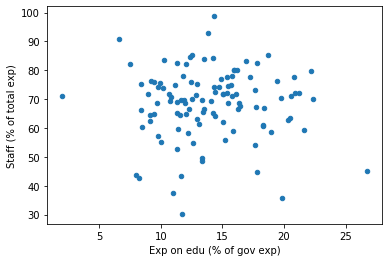

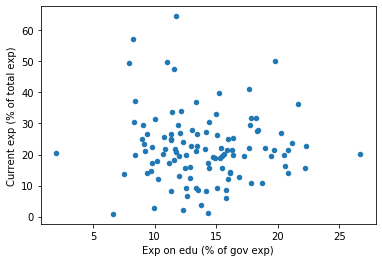

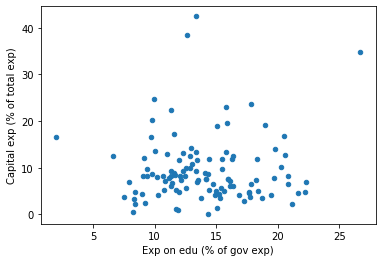

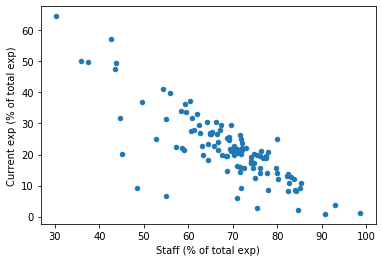

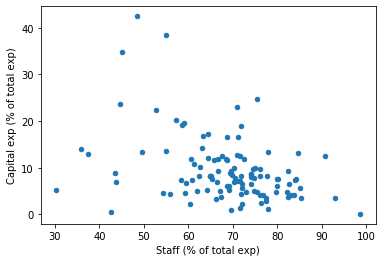

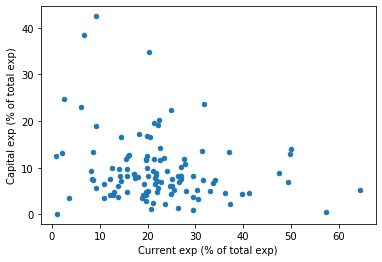

In [646]:
for i in range(len(s)):
    for j in range(i+1, len(s)):
        data.plot.scatter(s[i], s[j]) 